## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [2]:
import os
import keras
import itertools
import warnings 
warnings.filterwarnings('ignore')
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [128, 256]
MOMENTUM = 0.95

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for size in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

# Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-batch-size-tag:%s" % str(size)

    results[exp_name_tag] = {'train-loss':train_loss,
                             'valid-loss':valid_loss,
                             'train-acc':train_acc,
                             'valid-acc':valid_acc}






Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               

50000/50000 [==============================] - 6s 121us/step - loss: 0.3573 - acc: 0.8813 - val_loss: 2.1835 - val_acc: 0.4768
Epoch 40/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.3354 - acc: 0.8884 - val_loss: 2.3346 - val_acc: 0.4667
Epoch 41/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.3326 - acc: 0.8888 - val_loss: 2.3354 - val_acc: 0.4633
Epoch 42/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.3281 - acc: 0.8888 - val_loss: 2.1987 - val_acc: 0.4834
Epoch 43/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.3072 - acc: 0.8989 - val_loss: 2.3211 - val_acc: 0.4592
Epoch 44/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.2893 - acc: 0.9052 - val_loss: 2.3006 - val_acc: 0.4639
Epoch 45/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.2819 - acc: 0.9089 - val_loss: 2.2973 - val_acc: 0.4715
Epoch 46/50
50000/50000 [==============

Epoch 38/50
50000/50000 [==============================] - 4s 82us/step - loss: 0.3731 - acc: 0.8849 - val_loss: 1.8925 - val_acc: 0.4927
Epoch 39/50
50000/50000 [==============================] - 4s 80us/step - loss: 0.3473 - acc: 0.8943 - val_loss: 1.8978 - val_acc: 0.4932
Epoch 40/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.3267 - acc: 0.9029 - val_loss: 2.0120 - val_acc: 0.4728
Epoch 41/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.3240 - acc: 0.9010 - val_loss: 2.0527 - val_acc: 0.4856
Epoch 42/50
50000/50000 [==============================] - 4s 80us/step - loss: 0.3058 - acc: 0.9089 - val_loss: 2.0439 - val_acc: 0.4838
Epoch 43/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.2861 - acc: 0.9161 - val_loss: 2.0719 - val_acc: 0.4808
Epoch 44/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.2701 - acc: 0.9228 - val_loss: 2.0358 - val_acc: 0.4860
Epoch 45/50
50000/50000 [=========

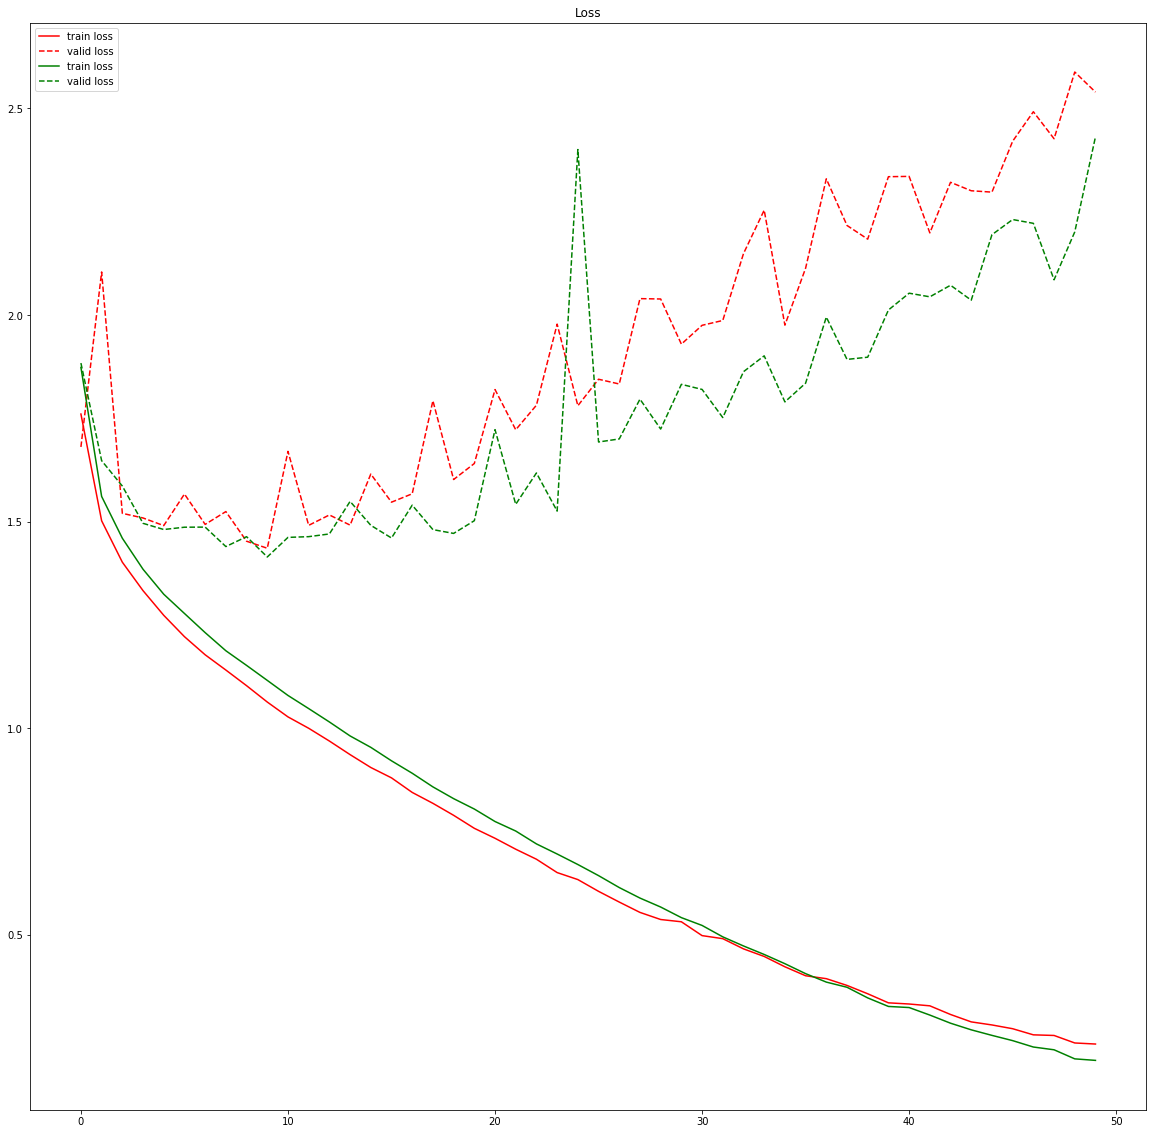

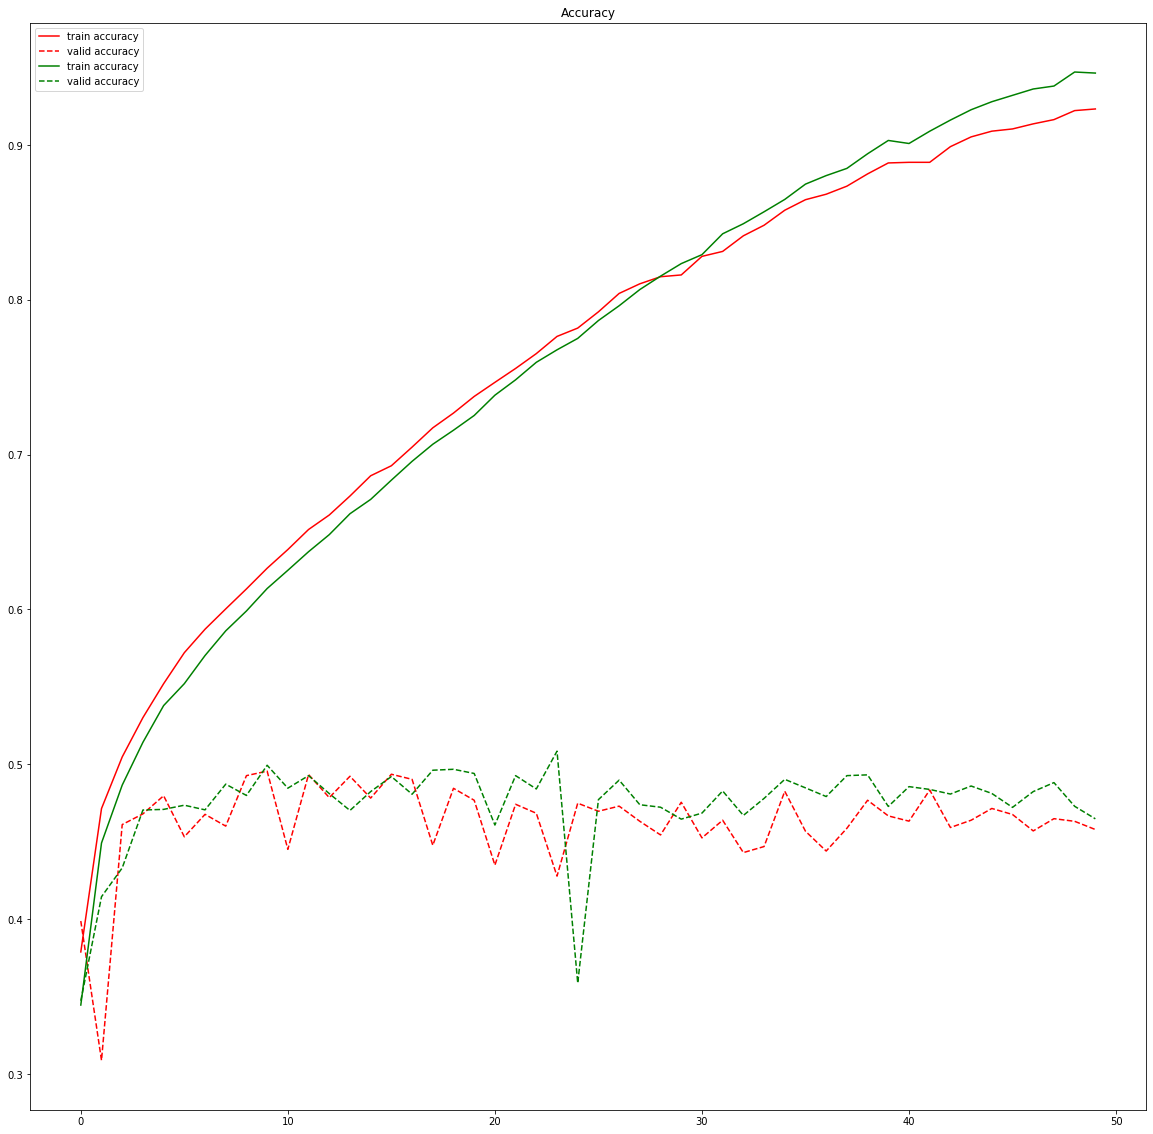

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(20, 20))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', color=color_bar[i], label="train loss")
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', color=color_bar[i], label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.figure(figsize=(20, 20))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', color=color_bar[i], label="train accuracy")
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', color=color_bar[i], label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()
